<a href="https://colab.research.google.com/github/w-sheng/cis519_final_project/blob/master/process_data_wei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import json
import os

#change this to your name
sender = "Annie Su"

output_file = "out.txt"

#change this path to be wherever your downloaded messages directory is
relative_path = 'messages_dir/inbox'

def iterate_over_working_directory(relative_path, output_file):
	out = open(output_file, "w")
	for subdir, dirs, files in os.walk(relative_path):
		for file in files:
			if (file.endswith('.json')):
				parse_json_and_write_to_txt(os.path.join(subdir, file), out)
	out.close()		

def parse_json_and_write_to_txt(json_filename, out):
  with open(json_filename, 'r') as f:
    json_dict = json.load(f)

  for item in json_dict["messages"]:
  	if (item["sender_name"] == sender):
  		for x in item:
  			if (x == 'content'):
  				out.write(item[x] + '\n')

iterate_over_working_directory(relative_path, output_file)


In [0]:
sent = []
with open('out.txt') as f:
  for l in f:
    sent.append(l)

In [0]:
len(sent)

226766

In [0]:
vocab = {}
for t in sent:
  words = t.split(' ')
  for w in words:
    if w in vocab:
      vocab[w] += 1
    else:
      vocab[w] = 1

In [0]:
len(vocab)

78314

In [0]:
import operator
sorted_vocab = sorted(vocab.items(), key=operator.itemgetter(1), reverse=True)

In [0]:
n = 50
words = []
freq = []
for l in sorted_vocab:
  print(l)
  (w,f) = l
  words.append(w)
  freq.append(f)
  n -= 1
  if (n == 0):
    break

('i', 32298)
('the', 21101)
('to', 19465)
('a', 17116)
('you', 15901)
('and', 13080)
('I', 12964)
('is', 12121)
('for', 10740)
('so', 10324)
('lol\n', 9561)
('in', 9512)
('it', 9455)
('like', 8975)
('but', 7971)
('do', 7586)
('my', 7405)
('was', 6908)
('of', 6572)
('just', 6454)
('on', 6451)
('at', 6447)
('be', 6365)
('have', 6341)
('u', 5900)
('that', 5888)
('LOL\n', 5738)
('this', 5658)
('think', 5622)
('not', 5428)
('are', 5406)
('we', 5236)
('if', 5198)
('its', 4938)
('can', 4821)
('ok', 4798)
('or', 4625)
('im', 4622)
('me', 4363)
('with', 3889)
('what', 3691)
('up', 3483)
('good', 3281)
('ya', 3181)
('no', 3101)
('did', 3086)
('too', 3012)
('also', 2962)
('all', 2953)
(':(\n', 2875)


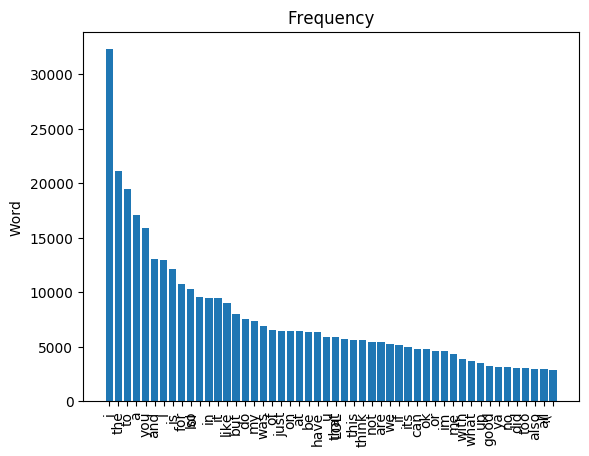

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.bar(words, freq)
plt.xticks(words, rotation='vertical')
plt.ylabel('Word')
plt.title('Frequency')

plt.show()

In [0]:
caps = []
no_caps = []

for w in vocab.keys():
  if (len(w) >= 1):
    if (w[0].isupper()):
      caps.append(w)
    else:
      no_caps.append(w)

In [0]:
len(caps)

15889

In [0]:
len(no_caps)

62424

In [0]:
num_char = 0
num_words = 0
for l in sent:
  num_char += len(l)
  num_words += len(l.split(' '))

print(num_char/len(sent))
print(num_words/len(sent))

27.26492507695157
5.379832073591279


In [0]:
import re
# regexes
lol_dict = {}
haha_dict = {}

for l in sent:
  mLol = re.findall(r'[Ll]+\s*[Oo]+\s*[Ll]+', l)
  # mHaha = re.findall(r'([Hh][Aa])+', l)
  mHaha = re.findall(r'([Hh]+\s*[Aa]+)\s+', l)

  # get correct match
  lolmatch = None
  hahamatch = None
  if mLol:
    if type(mLol) is list:
      lolmatch = mLol[0]
    else:
      lolmatch = mLol
  if mHaha:
    if type(mHaha) is list:
      hahamatch = mHaha[0]
    else:
      hahamatch = mHaha

  # update frequencies
  if lolmatch in lol_dict:
    lol_dict[lolmatch] += 1
  else:
    lol_dict[lolmatch] = 1
  
  if hahamatch in haha_dict:
    haha_dict[hahamatch] += 1
  else:
    haha_dict[hahamatch] = 1

In [0]:
import operator
lol_dict = sorted(lol_dict.items(), key=operator.itemgetter(1), reverse=True)

for l in lol_dict:
  print(l)

('lol', 12527)
('LOL', 7552)
('LOOL', 1252)
('LOOOL', 1214)
('Lol', 772)
('loool', 568)
('looool', 397)
('LOOOOL', 378)
('loooool', 195)
('LOOOOOL', 159)
('lool', 119)
('l o l', 93)
('looooool', 82)
('Looool', 76)
('LOOOOOOL', 67)
('Loooool', 55)
('Loool', 55)
('LOOOOOOOL', 39)
('loooooool', 38)
('lOL', 31)
('L O L', 27)
('Looooool', 26)
('L o l', 24)
('l ol', 21)
('looooooool', 21)
('lo l', 17)
('Loooooool', 16)
('LOOOOOOOOL', 14)
('LOOOOOOOOOL', 11)
('LOLL', 8)
('LOOOOOOOOOOOL', 8)
('Looooooool', 8)
('Lo l', 7)
('loooooooool', 7)
('l O l', 7)
('llol', 6)
('llo l', 6)
('LOOOOOOOOOOL', 6)
('LOl', 6)
('Loooooooool', 6)
('looooooooool', 6)
('LO L', 5)
('LLOL', 5)
('lolll', 5)
('LLOOL', 4)
('L OL', 4)
('loo l', 4)
('looooooooooool', 3)
('lOOL', 3)
('lLOL', 3)
('LOLLL', 3)
('loll', 3)
('llooool', 2)
('L O l', 2)
('Looooooooooool', 2)
('lloooool', 2)
('lOOOL', 2)
('lo L', 2)
('llo L', 2)
('loooooooooool', 1)
('LOOLL', 1)
('LoL', 1)
('LOOOLL', 1)
('ll ol', 1)
('lo  l', 1)
('LOLLLL', 1)
('ll 

In [0]:
import operator
haha_dict = sorted(haha_dict.items(), key=operator.itemgetter(1), reverse=True)

for h in haha_dict:
  print(h)

(None, 218015)
('ha', 4238)
('HA', 2688)
('h a', 603)
('HHA', 383)
('hha', 247)
('HHAA', 165)
('hhaa', 129)
('haa', 88)
('HAA', 83)
('Ha', 28)
('haaa', 27)
('haaaa', 16)
('H A', 14)
('haaaaa', 9)
('HAAA', 5)
('hhh a', 4)
('H a', 3)
('hhhaa', 2)
('HHHA', 2)
('hhha', 2)
('h  a', 1)
('hhhhh AA', 1)
('hhaaaaaa', 1)
('HAa', 1)
('hhHa', 1)
('hhaaa', 1)
('hh a', 1)
('HAAAA', 1)
('hhhhh a', 1)
('HHHAA', 1)
('Hha', 1)
('hHa', 1)
('hhhh a', 1)
('HAAAAAAAA', 1)
('hhhhhh a', 1)
